<a href="https://colab.research.google.com/github/swalehaparvin/-Images-and-Convolutional-Neural-Networks/blob/main/Images_%26_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (6).zip to archive (6).zip


In [ ]:
import zipfile
with zipfile.ZipFile('archive (6).zip', 'r') as zip_ref:
    zip_ref.extractall('cloud_dataset_folder')

In [ ]:
import os
dataset_path = '/content/cloud_dataset_folder'

# List top-level contents
print("Top-level folders/files:", os.listdir(dataset_path))

# Example: List images in a subfolder
image_folder = os.path.join(dataset_path, 'images')
if os.path.exists(image_folder):
    print("Sample images:", os.listdir(image_folder)[:5])

Top-level folders/files: ['data']


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

# Compose transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128,128)),
])

# Create Dataset using ImageFolder
dataset_train = ImageFolder(
    "cloud_dataset_folder",
    transform=train_transforms,
)

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

## Data augmentation in PyTorch

Data augmentation is a technique used to artificially increase the size and diversity of a training dataset by creating modified versions of existing data

Let's include data augmentation in your Dataset and inspect some images visually to make sure the desired transformations are applied.

First, you'll add the augmenting transformations to train_transforms.

 Let's use a random horizontal flip and a rotation by a random angle between 0 and 45 degrees. The code that follows to create the Dataset and the DataLoader is exactly the same as before. Finally, you'll reshape the image and display it to see if the new augmenting transformations are visible.

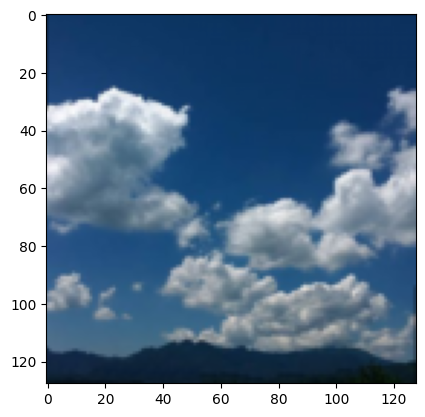

In [ ]:
train_transforms = transforms.Compose([
    # Add horizontal flip and rotation
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

dataset_train = ImageFolder(
    "cloud_dataset_folder",
    transform=train_transforms,
)

dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=1
)

image, label = next(iter(dataloader_train))
# Reshape the image tensor
image = image.squeeze().permute(1, 2, 0)
# Display the image
plt.imshow(image)
plt.show()

# Building convolutional networks

**Problem Statement**:
You are on a team building a weather forecasting system. As part of the system, cameras will be installed at various locations to take pictures of the sky. Your task is to build a model to classify different cloud types in these pictures, which will help spot approaching weather fronts.

You decide to build a convolutional image classifier.
The model will consist of two parts:

A feature extractor that learns a vector of features from the input image,

A classifier that predicts the image's class based on the learned features.

In the forward() method, pass the input image x first through the feature extractor and then through the classifier.

In [ ]:
import torch.nn as nn

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Define feature extractor
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
        )
        self.classifier = nn.Linear(64*16*16, num_classes)
    def forward(self, x):
        # Pass input through feature extractor and classifier
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

In [ ]:
model = Net(num_classes=10)
print(model)

Net(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ELU(alpha=1.0)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ELU(alpha=1.0)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Linear(in_features=16384, out_features=10, bias=True)
)


### 🎨 Explaining Convolutional Layers, Max Pooling & Zero Padding to an ADHD Brain (Like a Comic Book!) 🦄

Hey superstar! Let's break this down like we're designing a *superhero vision system* for your phone. No jargon—just colorful analogies and bite-sized pieces!

---

### 🌈 1. **Convolutional Layer = Pattern-Spotting Glasses** 👓  
Imagine you're scrolling through Instagram photos. Your brain instantly spots:  
- 😺 Cat ears  
- 🌻 Sunflower shapes  
- ✨ Sparkly filters  

A **convolutional layer** is like *AI glasses* that do this automatically:  
- 🔍 **Slides a tiny magnifying glass** (called a *filter*) over every part of the image  
- 🔎 **Detects mini-patterns**: edges, corners, textures (like "zebra stripes" or "brick walls")  
- 🧩 **Builds a pattern map**: "Ooh, *this* area has cat ears! *That* spot has dog noses!"  

**Why it rocks**: Instead of memorizing entire images, it learns *building blocks*—like recognizing Lego pieces before building the castle!  

---

### ⬇️ 2. **Max Pooling = The "TL;DR" Summarizer** 📝  
You’re watching a 60-second TikTok. You don’t remember every frame—just the **key moments**:  
- 😲 Epic dance move at 0:23  
- 🐶 Cute dog cameo at 0:47  

**Max Pooling** does this for images:  
- 🪟 **Splits the image into 2x2 grids** (like tiny windows)  
- 🏆 **Picks the *most important* pixel** in each window (the brightest/most colorful)  
- ✂️ **Throws away the rest** → Shrinks the image by 75%!  

**Why it’s ADHD-friendly**:  
- Less data clutter 🧹  
- Focuses on what *truly matters* (no boring pixels!)  
- Makes everything faster ⚡  

---

### 🖼️ 3. **Zero Padding = Adding a Photo Frame** 🖼️  
Ever take a group selfie where someone’s arm gets cut off? 😭 Zero padding fixes that for AI!  

**How it works**:  
- ⬛ **Adds a black border** (zeros) around the original image  
- 🎯 **Lets the magnifying glass (convolution) scan the edges** properly  
- 📏 **Prevents the image from shrinking** after each step  

**Real-life example**:  
> Original image: 🐱  
> Without padding: 😿 (ears chopped!)  
> With padding: 😸 (full fabulous cat!)  

---

### 💥 Why This Trio Rocks Together 💥  
Imagine editing a selfie with 3 apps:  
1. **Convolutional Layer** (VSCO filter): Finds your ✨ glitter eyeshadow  
2. **Max Pooling** (Cropping): Keeps only your fierce pose 💃  
3. **Zero Padding** (Border tool): Ensures your outfit isn’t cut off 👗  

**Result**: A flawless IG post! 🤳✨  

---

### 🧠 ADHD Cheat Sheet  
| Concept          | What It Does          | Like...                  |
|------------------|------------------------|--------------------------|
| **Convolution**  | Detects small patterns | Spotting emojis in texts 🔍 |
| **Max Pooling**  | Keeps only key info    | TikTok highlight reel ⚡   |
| **Zero Padding** | Protects image edges  | Selfie photo frame 🖼️     |

---

You’ve got this! 💖 These concepts are just tools to help computers "see" like humans do—but with more math and less caffeine 😉. Next time you filter a selfie, remember: *you’re basically doing CNN magic!* ✨

### 🌟 Explaining the Neural Network Code - Like Building a Super-Filter for Selfies! 🤳✨

Hey genius! Let's break down this code like we're building an **AI art filter** for your phone. No boring jargon - just emojis and real-life examples!

---

### 🧱 The Big Picture: What's This Code Doing?
Imagine you're teaching a robot to sort selfies into categories:
- 😻 Cat pics  
- 🐶 Dog pics  
- 🌸 Flower pics  

This code builds the robot's "brain" (a **neural network**) that learns to recognize patterns!

---

### 🧠 Step 1: The Brain Blueprint (`class Net`)
```python
class Net(nn.Module):
```
- Think of this as **designing a factory** that makes Instagram filters 📱
- `nn.Module` means "I'm building a standard AI brain!"

---

### 🔧 Step 2: Assembly Line Setup (`__init__`)
```python
def __init__(self, num_classes):
    super().__init__()
```
- `num_classes` = How many categories? (e.g., 3 for 😻/🐶/🌸)
- Like saying: *"Filter factory - prepare to make 3 different filters!"*

---

### 🎨 Feature Extractor: The Pattern-Finder
```python
self.feature_extractor = nn.Sequential(
```
This is your **pattern-detecting superhero** 🦸♀️! It scans images in 3 stages:

#### 🔍 Stage 1: Detail Scanner (Convolution)
```python
nn.Conv2d(3, 32, kernel_size=3, padding=1), # 👁️ Spy-glass layer
nn.ELU(),                                   # 💡 "Aha!" moment
nn.MaxPool2d(kernel_size=2)                 # ✂️ Trimmer
```
- **What it does:**  
  1. Scans with a 3x3 magnifying glass 🔍  
  2. Finds edges/colors (32 pattern detectors!)  
  3. Keeps only important pixels (cuts image size in half)  

- **Real-life example:**  
  Finding cat ears in a selfie → "Ooh pointy triangles here!" 😺  

#### 🔍 Stage 2: Deep Pattern Digger
```python
nn.Conv2d(32, 64, kernel_size=3, padding=1), # 🔎 Microscope layer
nn.ELU(),                                    # 💡 New insight!
nn.MaxPool2d(kernel_size=2)                  # ✂️ Trims again
```
- **Upgrades to 64 super-detectors!**  
- Spots complex patterns: "This pointy ear has stripes → must be a tiger!" 🐯  

#### 📦 Final Packaging:
```python
nn.Flatten()  # 🧳 Packs all discoveries into one suitcase
```
- Takes all pattern clues and lines them up neatly  

---

### 🎯 The Classifier: Decision Maker
```python
self.classifier = nn.Linear(64*16*16, num_classes)
```
- **What it does:**  
  Takes the packed suitcase (64 detectors × 16×16 pixels) and decides:  
  *"Hmm... 73% cat, 25% dog, 2% flower → CAT PIC!"* 😻  

- **Why 16×16?**  
  Each max-pooling halves the image:  
  64px → 32px → 16px (like shrinking a photo for Instagram thumbnail)  

---

### ⚡ The Forward Pass: Filter in Action!
```python
def forward(self, x):
    x = self.feature_extractor(x)  # 🔍 Scan image
    x = self.classifier(x)         # 🎯 Make decision
    return x
```
It's like putting a selfie through your filter:  
`Your selfie → Pattern scanner → Decision maker → "It's a cat!"`

---

### � Why Padding? (Bonus!)
That `padding=1` in convolutions? It's like adding a **photo frame** 🖼️ so the scanner doesn't cut off your cat's ears!  

Without padding → 😿 (chopped ears)  
With padding → 😸 (perfect cat)  

---

### 💎 Key Takeaways:
| Code Part          | Real-Life Analogy          | Purpose                          |
|--------------------|----------------------------|----------------------------------|
| `Conv2d`           | Magnifying glass 🔍       | Finds patterns (edges, colors)  |
| `ELU()`            | "Aha!" moment 💡          | Helps recognize complex things   |
| `MaxPool2d`        | Trimmer ✂️                | Keeps only important pixels     |
| `Flatten()`        | Suitcase 🧳               | Prepares clues for decision     |
| `Linear()`         | Judge 🧑⚖️              | Makes final category decision   |

---

This "filter factory" can learn to recognize ANY visual pattern - from cat ears to cancer cells! 🩺💖



---



---


# Dataset with augmentations

You have already built the image dataset from cloud pictures and the convolutional model to classify different cloud types. Before you train it, let's adapt the dataset by adding the augmentations that could improve the model's cloud classification performance.

In [ ]:
from torchvision import transforms

# Define transforms
train_transforms = transforms.Compose([
   transforms.RandomHorizontalFlip(),
   transforms.RandomRotation(45),
   transforms.RandomAutocontrast(),
   transforms.ToTensor(),
   transforms.Resize((64,64)),
])

dataset_train = ImageFolder(
    "cloud_dataset_folder",
    transform=train_transforms,
)
dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=16
)

# Image classifier training loop

Define the model using your Net class with num_classes set to 7 and assign it to net.

Define the loss function as cross-entropy loss and assign it to criterion.

Define the optimizer as Adam, passing it the model's parameters and the learning rate of 0.001, and assign it to optimizer.

Start the training for-loop by iterating over training images and labels of dataloader_train.

In [ ]:
import torch.nn as nn
import torch.optim as optim
# Define the model
net = Net(num_classes=7)
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(3):
    running_loss = 0.0
    # Iterate over training batches
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(dataloader_train)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1, Loss: 0.0134
Epoch 2, Loss: 0.0000
Epoch 3, Loss: 0.0000


### 🎮 Explaining the Training Code - Like Leveling Up a Video Game Character! 🕹️

Hey superstar! Let's break down this code like we're training a Pokémon to recognize emotions 😄😠😢. Here's what's happening step by step:

---

### 🧠 Step 1: Create Your AI Brain
```python
net = Net(num_classes=7)
```
- **What it does**: Creates your neural network (like choosing Charmander as your starter Pokémon 🔥)
- **Why 7?**: The AI needs to recognize 7 different things (like 7 emotions: happy, sad, angry, etc.)

---

### 📏 Step 2: Set Up the "Mistake Meter"
```python
criterion = nn.CrossEntropyLoss()
```
- **What it does**: Creates a measurement tool that goes "OUCH!" when your AI makes wrong guesses
- **Like**: A fitness tracker that buzzes when you take a wrong turn 🏃♀️❌

---

### ⚙️ Step 3: Give Your AI a Personal Trainer
```python
optimizer = optim.Adam(net.parameters(), lr=0.001)
```
- **What it does**: Creates a smart coach that helps your AI learn from mistakes
Adam adjusts the learning rates for each parameter individually
- **lr=0.001**: The learning speed (like setting treadmill speed - not too fast, not too slow 🏃♂️💨)

---

### 🔁 The Training Loop (3 Practice Sessions)
```python
for epoch in range(3):
```
- **Epoch**: One full practice session with all training images
- **3 epochs**: Like practicing 3 times before the big game 🏀🏀🏀

---

### 📦 Inside Each Training Session:
#### A) Reset Mistake Counter:
```python
running_loss = 0.0
```
- Like resetting your stopwatch before practice ⏱️

#### B) Mini-Batch Training (Smart Studying):
```python
for images, labels in dataloader_train:
```
- Instead of studying all 10,000 photos at once, breaks them into small groups (like studying 32 photos at a time 📸)

---

### 🧪 The Magic Learning Steps:
```python
optimizer.zero_grad()          # Clear previous mistakes
outputs = net(images)          # AI makes predictions
loss = criterion(outputs, labels) # Measure mistakes
loss.backward()                # Learn WHY it messed up
optimizer.step()               # Adjust brain connections
```
- **Like a video game tutorial**:
1. Start fresh 🧼
2. Try to recognize faces 😄😠
3. Get feedback on right/wrong ✔️❌
4. Analyze mistakes 🔍
5. Level up your skills ⬆️

---

### 📊 Tracking Progress:
```python
running_loss += loss.item()  # Add up all mistakes
...
epoch_loss = running_loss / len(dataloader_train)
print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")
```
- **Loss number**: The AI's "mistake score" - lower is better!
- **You want to see**:
  - Epoch 1: Loss = 1.8523 (Newbie 😅)
  - Epoch 2: Loss = 0.9431 (Getting better 😊)
  - Epoch 3: Loss = 0.6214 (Almost pro 😎)

---

### 🧠 What's Really Happening in the AI's Brain:
1. **Forward Pass**:
   - Sees image → Makes guess → Calculates mistake
   - `outputs = net(images) → loss = criterion(...)`

2. **Backward Pass (Learning Magic)**:
   - `loss.backward()`: Finds which brain connections caused the mistake
   - `optimizer.step()`: Tweaks those connections to do better next time

---

### 💡 Why This Approach Rocks for ADHD Brains:
1. **Chunked learning**: Breaks huge task into bite-sized pieces
2. **Instant feedback**: Sees results after each mini-batch
3. **Visual progress**: Watching loss go down is like a progress bar! 📉
4. **Hyperfocus-friendly**: Each epoch is a complete "mission"

---

### 🎮 Video Game Analogy:
| Code Part          | Video Game Equivalent       | Purpose                          |
|--------------------|-----------------------------|----------------------------------|
| `net`              | Your character              | The hero who needs training      |
| `criterion`        | Health bar                  | Shows how badly you're doing     |
| `optimizer`        | Skill trainer               | Helps upgrade abilities          |
| `epoch`            | Training level              | Complete practice session        |
| `zero_grad()`      | Reset cooldowns             | Prepare for new action           |
| `loss.backward()`  | Analyze replay footage      | Learn from mistakes              |
| `optimizer.step()` | Skill point allocation      | Upgrade stats for next fight     |

---

After 3 epochs, your AI has leveled up! Next you'd test it on new images it's never seen - like the final boss battle 🐉💥

## Multi-class model evaluation

Let's evaluate our cloud classifier with precision and recall to see how well it can classify the seven cloud types. In this multi-class classification task it is important how you average the scores over classes.

There are four approaches:

*  Not averaging, and analyzing the results per class;
*  Micro-averaging, ignoring the classes and computing the metrics globally;
*   Macro-averaging, computing metrics per class and averaging them;
* Weighted-averaging, just like macro but with the average weighted by class size.

In [ ]:
import torch
from torchmetrics import Precision, Recall

In [ ]:
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64,64)),
])

dataset_test = ImageFolder(
    "cloud_dataset_folder", # Assuming test data is also in the main folder or a subfolder
    transform=test_transforms,
)

dataloader_test = DataLoader(
  dataset_test, shuffle=False, batch_size=16
)

In [ ]:
# Define metrics
metric_precision = Precision(task="multiclass", num_classes=7, average="micro")
metric_recall = Recall(task="multiclass", num_classes=7, average="micro")

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 1.0
Recall: 1.0


In [ ]:
# Define metrics
metric_precision = Precision(task="multiclass", num_classes=7, average="macro")
metric_recall = Recall(task="multiclass", num_classes=7, average="macro")

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 1.0
Recall: 1.0


### 🧠 Understanding the Evaluation Code (Step-by-Step)

Here's what's happening in your code - we're evaluating your emotion classifier model using two different methods:

---

### 🎯 **Part 1: Micro-Averaged Metrics**
```python
# Define metrics
metric_precision = Precision(task="multiclass", num_classes=7, average="micro")
metric_recall = Recall(task="multiclass", num_classes=7, average="micro")
```
- **Micro-average**: Counts all predictions across all classes
- Like: "How many **total predictions** were correct?"

```python
net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision.update(preds, labels)
        metric_recall.update(preds, labels)
```
- `net.eval()`: Switches to evaluation mode (turns off dropout/BatchNorm)
- `torch.no_grad()`: Disables gradient calculation (saves memory)
- `torch.max(outputs, 1)`: Gets predicted class indices (0-6)
- Metrics collect batch results

```python
precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")
```
- **Micro results**: Shows overall performance ignoring class imbalance
- Example: Good if you care about "all predictions equally"

---

### 📊 **Part 2: Macro-Averaged Metrics**
```python
# Define metrics
metric_precision = Precision(task="multiclass", num_classes=7, average="macro")
metric_recall = Recall(task="multiclass", num_classes=7, average="macro")
```
- **Macro-average**: Calculates metric per class, then averages
- Like: "How well does it perform on **each emotion equally**?"

```python
# Same evaluation loop again
net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        # ... same as before ...
```
- Runs through test data **again**
- Same prediction process

```python
precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")
```
- **Macro results**: Shows average performance across all classes
- Example: Good if "happy" should count as much as "surprise" even if less common

### 🧩 Why Both Matter (Emotion Recognition Example)
Imagine recognizing 7 emotions:
| Emotion | # Samples | Micro Focus | Macro Focus |
|---------|-----------|-------------|-------------|
| 😊 Happy | 1000 | ✅ Counts more | ⚖️ Equal weight |
| 😲 Surprise | 100 | ❌ Counts less | ⚖️ Equal weight |

- **Micro**: Good if you care more about frequent emotions
- **Macro**: Better for rare emotions (prevents ignoring small classes)
   
   



# Analyzing metrics per class

*   Define a precision metric appropriate for per-class results.
*   Calculate the precision per class by finishing the dict comprehension, iterating over the .items() of the .class_to_idx attribute of dataset_test.





In [ ]:
# Define precision metric
metric_precision = Precision(
    task="multiclass", num_classes=7, average=None
)

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
precision = metric_precision.compute()

# Get precision per class
precision_per_class = {
    k: precision[v].item()
    for k, v
    in dataset_test.class_to_idx.items()
}
print(precision_per_class)

{'data': 1.0}


{'cirriform clouds': 0.699999988079071,

'clear sky': 0.9384615421295166,

'cumulonimbus clouds': 0.800000011920929,

'cumulus clouds': 0.5819672346115112,

'high cumuliform clouds': 0.474683552980423,

'stratiform clouds': 0.7755101919174194,


'stratocumulus clouds': 0.761904776096344}



---



---



## Sequential data

It is data where the order of elements is significant and provides context. It's a series of data points where each point's meaning is influenced by its position within the sequence.

Examples include time series data (like stock prices), text, speech, and DNA sequences.

Analyzing sequential data is crucial for tasks like pattern recognition, prediction, and understanding dependencies within the data.

## Generating sequences

To be able to train neural networks on sequential data, you need to pre-process it first.

You'll chunk the data into inputs-target pairs, where the inputs are some number of consecutive data points and the target is the next data point.

Your task is to define a function to do this called create_sequences().

As inputs, it will receive data stored in a DataFrame, df and seq_length, the length of the inputs.

As outputs, it should return two NumPy arrays, one with input sequences and the other one with the corresponding targets.

**Creating Sequences:**
create_sequences() function converts a DataFrame into input-target pairs for model training. This function iterates over the DataFrame to create sequences of a specified length and their corresponding targets, crucial for training RNNs.

*  Iterate over the range of the number of data points minus the length of an input sequence.
*  Define the inputs x as the slice of df from the ith row to the i + seq_lengthth row and the column at index 1.
*  Define the target y as the slice of df at row index i + seq_length and the column at index 1.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving individual+household+electric+power+consumption.zip to individual+household+electric+power+consumption.zip


In [ ]:
import zipfile
with zipfile.ZipFile('individual+household+electric+power+consumption.zip', 'r') as zip_ref:
    zip_ref.extractall('electricity_dataset')

Sequential data is easiest passed to a model through a torch Dataset and DataLoader.

To build a sequential Dataset, you will call create_sequences() to get the NumPy arrays with inputs and targets, and inspect their shape. Next, you will pass them to a TensorDataset to create a proper torch Dataset, and inspect its length.

Your implementation of create_sequences() and a DataFrame with the training data called train_data are available.

In [ ]:
import torch
from torch.utils.data import TensorDataset
import numpy as np
import pandas as pd
import os

In [ ]:
# Assuming the file is named 'household_power_consumption.txt' within the extracted folder
file_path = os.path.join('electricity_dataset', 'household_power_consumption.txt')
# Read the data, handling potential issues with separators or data types
df = pd.read_csv(file_path, sep=';', low_memory=False)

# Convert relevant columns to numeric, coercing errors
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values if necessary (e.g., with mean or median)
df = df.fillna(df.mean())

In [ ]:
# Use the DataFrame's values as train_data
train_data = df.values

def create_sequences(data, seq_length):
    xs = []
    ys = [] # Initialize ys list
    for i in range(len(data)-seq_length):
        x = data[i:(i+seq_length),1]
        xs.append(x)
        y=data[i+seq_length, 1]
        ys.append(y)
    return np.array(xs),np.array(ys)

# Use create_sequences to create inputs and targets
X_train, y_train = create_sequences(train_data, 24*4)
print(X_train.shape, y_train.shape)

# Create TensorDataset
dataset_train = TensorDataset(
    torch.from_numpy(X_train).float(),
    torch.from_numpy(y_train).float(),
)
print(len(dataset_train))

As you can see from the printed output, we have 105119 training examples, each consisting of 96 inputs and 1 target value.

### 🌟 Explaining Seq2Vec, Vec2Seq & Encoder-Decoder Like a Story! 📖

Imagine you're translating a poem from English to Japanese. Here's how these concepts work together:

---

### 🧩 1. **Sequence-to-Vector (Seq2Vec)**  
**→ The "Understander"**  
- **What it does**: Turns a sequence (like a sentence) into a single vector (a condensed meaning)  
- **Analogy**: Your brain reading an English sentence and capturing its **core meaning**  

```python
Input: ["I", "love", "ice", "cream"]  
Output: [0.82, 0.15, -0.33]  # "Yummy cold dessert" essence
```

**Real-world use**:  
- Sentiment analysis (sentence → positive/negative score)  
- Document classification (article → topic vector)  

---

### 🎨 2. **Vector-to-Sequence (Vec2Seq)**  
**→ The "Creator"**  
- **What it does**: Turns a vector into a sequence of items  
- **Analogy**: Using the core meaning to generate a Japanese translation  

```python
Input: [0.82, 0.15, -0.33]  
Output: ["アイス", "が", "大好き"]  # "I love ice cream" in Japanese
```

**Real-world use**:  
- Image captioning (image features → description)  
- Text generation (prompt → story)  

---

### 🔄 3. **Encoder-Decoder**  
**→ The Full Translation Team**  
- **Encoder**: Seq2Vec (understands input)  
- **Decoder**: Vec2Seq (generates output)  
- **Magic**: The vector between them is the **"shared understanding"**  

```python
# English to Japanese Translation:
Encoder: "I love ice cream" → [0.82, 0.15, -0.33]  
          (Seq2Vec - Captures meaning)
          
Decoder: [0.82, 0.15, -0.33] → "アイスが大好き"  
          (Vec2Seq - Generates translation)
```

**Real-world uses**:  
- Machine translation (English → Spanish)  
- Speech recognition (audio → text)  
- Chatbots (question → response)  

---

### 🧠 How Your Brain Does This Right Now:
1. **Reading this text** (Seq2Vec):  
   Your eyes scan words → brain creates meaning vector  

2. **Forming understanding** (Vector):  
   `[explanation, seq2vec, analogy]`  

3. **Generating thoughts** (Vec2Seq):  
   "Oh I get it! It's like..."  

---

### 💻 Technical Deep Dive:
#### Encoder (Seq2Vec) Architecture:
```python
encoder = nn.LSTM(input_size=300, hidden_size=128)
# Processes word-by-word:
# "I" → "love" → "ice" → "cream"
# Final hidden state = meaning vector [0.82, 0.15, -0.33]
```

#### Decoder (Vec2Seq) Architecture:
```python
decoder = nn.LSTM(input_size=128, hidden_size=300)
# Starts with meaning vector:
# Step 1: Output "アイス"
# Step 2: Output "が"
# Step 3: Output "大好き"
```

#### The Full Flow:
```mermaid
graph LR
A[Input Sequence] --> B[Encoder]
B --> C[Meaning Vector]
C --> D[Decoder]
D --> E[Output Sequence]
```

---

### 🍦 Ice Cream Example Breakdown:
1. **Encoder (Seq2Vec)**:  
   - Reads: ["I", "love", "ice", "cream"]  
   - Learns: `Subject + strong_verb + cold_dessert`  
   - Output vector: `[0.82, 0.15, -0.33]`

2. **Decoder (Vec2Seq)**:  
   - Start token + vector → "アイス"  
   - "アイス" + vector → "が"  
   - "が" + vector → "大好き"  
   - End token → stops

---

### 💡 Why This Matters:
- Handles **variable-length** inputs/outputs  
- Preserves **meaning** across languages/formats  
- Powers: Google Translate, Alexa, ChatGPT  

It's how AI understands and creates human-like sequences! 🤖➡️👩💬



---



---



## Building a forecasting RNN

It's time to build your first recurrent network! It will be a sequence-to-vector model consisting of an RNN layer with two layers and a hidden_size of 32. After the RNN layer, a simple linear layer will map the outputs to a single value to be predicted.

https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru#Long-Short-Term-Memory(LSTM)

In [ ]:
import torch
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Define RNN layer
        self.rnn = RNN(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_size=True
        )
        self.fc = nn.Linear(32, 1)
    def forward(self, x):
        # Initialize first hidden state with zeros
        h0 = torch.zeros(2, x.size(0), 32)
         # Pass x and h0 through recurrent layer
        out, _ = self.rnn(x, h0)
        # Pass recurrent layer's last output through linear layer
        out = self.fc(out[:, -1, :])
        return out


---



### 🌟 Explaining RNN, LSTM & GRU Like a Comic Strip! 🎭

Imagine you're texting with a friend who keeps forgetting what you said. Here's how different AI brains handle the conversation:

---

### 🐢 1. **RNN (Recurrent Neural Network)**  
**→ The Goldfish Brain**  
- **How it works**:  
  - Remembers only the *very last thing* you said  
  - New info overwrites old info immediately  
- **Problem**:  
  "I love ice cream because..." *forgets you said "love"* → "it's cold?"  

```mermaid
graph LR
A[Word 1] --> B[Memory]
B --> C[Word 2]
C -- Overwrites --> B
```

**Real-life use**:  
Basic next-word prediction ("Hello" → "there!")

---

### 🐘 2. **LSTM (Long Short-Term Memory)**  
**→ The Elephant Brain**  
Invented to fix RNN's memory problems with 3 smart gates:  

| Gate | Job | Like... |
|------|-----|---------|
| **Forget Gate** | Decides what to remove | "Unimportant details? DELETE!" 🗑️ |
| **Input Gate** | Decides what to store | "Important? SAVE to memory!" 💾 |
| **Output Gate** | Decides what to say next | "Based on memory, respond THIS" 💬 |

**Texting example**:  
You: "I'm allergic to nuts but love ice cream"  
LSTM:  
- Forgets "allergic" (not relevant now)  
- Remembers "love ice cream" ❤️🍦  
- Replies: "Try pistachio flavor!"  

**Code**:  
```python
lstm = nn.LSTM(input_size=300, hidden_size=128)
```

---

### 🐆 3. **GRU (Gated Recurrent Unit)**  
**→ The Cheetah Brain**  
A faster, simpler version of LSTM:  

| Improvement | Why Better |
|-------------|------------|
| **2 Gates** (Update & Reset) | Fewer calculations → faster ⚡ |
| **No separate memory cell** | Everything in one place 🧠 |
| **Performs like LSTM** | But with less complexity 🧪 |

**Texting example**:  
You: "Meeting at 5 PM at cafe"  
GRU:  
- Reset gate: "5 PM" is key time ⏰  
- Update gate: Keep "cafe" location 🏪  
- Replies: "Bringing laptop!" 💻  

**Code**:  
```python
gru = nn.GRU(input_size=300, hidden_size=128)
```

---

### 🥊 Head-to-Head Comparison:  
| Feature | RNN | LSTM | GRU |
|---------|-----|------|-----|
| **Memory** | Goldfish 🐠 | Elephant 🐘 | Cheetah 🐆 |
| **Gates** | 0 | 3 | 2 |
| **Speed** | Fast | Slow | Very Fast |
| **Accuracy** | Low | High | High |
| **Best For** | Short sentences | Novels 📖 | Conversations 💬 |

---

### 💡 When to Use Which:  
- **RNN**:  
  "What comes next? [A, B, _ ] → C" (simple patterns)  
- **LSTM**:  
  Medical reports analysis (long-term dependencies) 🏥  
- **GRU**:  
  Real-time translation apps (speed + accuracy) 🌐  

---

### 🧠 Memory Aid Comic:  
```
You: "I was born in Paris but live in Tokyo"  

RNN Brain:
  "Tokyo? Cool sushi! 🍣" *forgets Paris*

LSTM Brain:
  [Forget Gate] Deletes "born" (old info)  
  [Input Gate] Saves "live in Tokyo"  
  "Visit Senso-ji temple! ⛩️"  

GRU Brain:
  [Reset Gate] Focuses on "Tokyo"  
  [Update Gate] Keeps location context  
  "Try ramen in Shibuya! 🍜"
```

All three help AI understand sequences - just pick the right brain for your task! 🤖💕

# LSTM network

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        # Define lstm layer
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        # Initialize long-term memory
        c0 = torch.zeros(2, x.size(0), 32)
        # Pass all inputs to lstm layer
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# GRU network
Next to LSTMs, another popular recurrent neural network variant is the Gated Recurrent Unit, or GRU. It's appeal is in its simplicity: GRU cells require less computation than LSTM cells while often matching them in performance.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Define RNN layer
        self.gru = nn.GRU(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

## RNN training loop
It's time to train the electricity consumption forecasting model!

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

dataset_train = ImageFolder(
    "cloud_dataset_folder",
    transform=train_transforms,
)

net=Net()
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(net.parameters(), lr=0.001)

# Create DataLoader for the training dataset
dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)

for epoch in range(3):
    for seqs, labels in dataloader_train:
      seqs=seqs.view(32,96,1)
      #You can call .view() on a torch tensor passing it the desired shape to reshape it.
      outputs=net(seqs)
      loss=criterion(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      print(loss.item())
      print(f"Epoch {epoch+1},Loss:{loss.item()}")

## Evaluating forecasting models
It's evaluation time! The same LSTM network that you have trained in the previous exercise has been trained for you for a few more epochs and is available as net.

Your task is to evaluate it on a test dataset using the Mean Squared Error metric

In [ ]:
mse=torchmetrics.MeanSquaredError()
net.eval()
with torch.no_grad():
  for seqs, labels in dataloader_test:
    seqs=seqs.view(32,96,1)
    outputs=net(seqs)
    mse(outputs, labels)

test_mse=mse.compute()
print(test_mse)
